# 机器学习工程师纳米学位
## 强化学习
## 项目 4: 训练智能出租车学会驾驶

欢迎来到机器学习工程师纳米学位的第四个项目！在这个notebook文件中，模板代码已经提供给你，有助于你对*智能出租车*的分析和实现学习算法。你无须改动已包含的代码，除非另有要求。 你需要回答notebook文件中给出的与项目或可视化相关的问题。每一个你要回答的问题前都会冠以**'问题 X'**。仔细阅读每个问题，并在后面**'回答'**文本框内给出完整的回答。你提交的项目会根据你对于每个问题的回答以及提交的`agent.py`的实现来进行评分。 

>**提示：** Code 和 Markdown 单元格可通过 **Shift + Enter** 快捷键来执行。此外，Markdown可以通过双击进入编辑模式。

-----

## 开始
在这个项目中，你将构建一个优化的Q-Learning驾驶代理程序，它会操纵*智能出租车* 通过它的周边环境到达目的地。因为人们期望*智能出租车*要将乘客从一个地方载到另一个地方，驾驶代理程序会以两个非常重要的指标来评价：**安全性**和**可靠性**。驾驶代理程序在红灯亮时仍然让*智能出租车*行驶往目的地或者勉强避开事故会被认为是**不安全**的。类似的，驾驶代理程序频繁地不能适时地到达目的地会被认为**不可靠**。最大化驾驶代理程序的**安全性**和**可靠性**保证了*智能出租车*会在交通行业获得长期的地位。

**安全性**和**可靠性**用字母等级来评估，如下：

| 等级 	| 安全性 	| 可靠性 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	| 代理程序没有任何妨害交通的行为，<br/>并且总是能选择正确的行动。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的100%。 |
|   A   	| 代理程序有很少的轻微妨害交通的行为，<br/>如绿灯时未能移动。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的90%。 |
|   B   	| 代理程序频繁地有轻微妨害交通行为，<br/>如绿灯时未能移动。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的80%。 |
|   C   	| 代理程序有至少一次重大的妨害交通行为，<br/>如闯红灯。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的70%。 |
|   D   	| 代理程序造成了至少一次轻微事故，<br/>如绿灯时在对面有车辆情况下左转。	| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的60%。 |
|   F   	| 代理程序造成了至少一次重大事故，<br/>如有交叉车流时闯红灯。	| 代理程序在合理时间内到达目的地的次数<br />未能达到行驶次数的60%。 |

为了协助评估这些重要的指标，你会需要加载可视化模块的代码，会在之后的项目中用到。运行下面的代码格来导入这个代码，你的分析中会需要它。

In [1]:
# 检查你的Python版本
from sys import version_info
if version_info.major != 2 and version_info.minor != 7:
    raise Exception('请使用Python 2.7来完成此项目')

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### 了解世界
在开始实现你的驾驶代理程序前，首先需要了解*智能出租车*和驾驶代理程序运行的这个世界（环境）。构建自我学习的代理程序重要的组成部分之一就是了解代理程序的特征，包括代理程序如何运作。原样直接运行`agent.py`代理程序的代码，不需要做任何额外的修改。让结果模拟运行一段时间，以观察各个不同的工作模块。注意在可视化模拟程序（如果启用了），**白色车辆**就是*智能出租车*。

### 问题 1
用几句话，描述在运行默认的`agent.py`代理程序中，你在模拟程序里观察到了什么。一些你可以考虑的情况：
- *在模拟过程中，智能出租车究竟移动了吗？*
- *驾驶代理程序获得了什么样的奖励？*
- *交通灯的颜色改变是如何影响奖励的？*

**提示：** 从顶层的`/smartcab/`目录（这个notebook所在的地方），运行命令
```bash
'python smartcab/agent.py'
```

**回答：**
1. 观察了10分钟，智能出租车没有移动。
2. 当前为红灯时，智能出租车没有动作获得了正数奖励；当前为绿灯时，智能出租车没有动作获得了负奖励（也就是惩罚）
3. 当前为红灯时，智能出租车静止未动获得了正数奖励；当前为绿灯时，如果前方没有车流，智能出租车没有动作获得了负奖励（也就是惩罚），如果前方有车流，静止未动的智能车获得了正向奖励。

### 理解代码
除了要了解世界之外，还需要理解掌管世界、模拟程序等等如何运作的代码本身。如果一点也不去探索一下*“隐藏”*的器件，就试着去创建一个驾驶代理程序会很难。在顶层的`/smartcab/`的目录下，有两个文件夹：`/logs/` （之后会用到）和`/smartcab/`。打开`/smartcab/`文件夹，探索每个下面的Python文件，然后回答下面的问题。

### 问题 2
- *在*`agent.py`* Python文件里，选择 3 个可以设定的 flag，并描述他们如何改变模拟程序的。*
- *在*`environment.py`* Python文件里，当代理程序执行一个行动时，调用哪个Environment类的函数？*
- *在*`simulator.py`* Python 文件里，*`'render_text()'`*函数和*`'render()'`*函数之间的区别是什么?*
- *在*`planner.py`* Python文件里，*`'next_waypoint()`* 函数会先考虑南北方向还是东西方向?*

**回答：**
1. 以下是在 agent.py 文件中选择的三个Flag
    * 创建 Enviroment 时可以设置的verbos 当设置为 True 时可以显示额外的调试信息  
    * 创建 Agent 时可以设置的 learning 参数，当设置为 True 时，强制使用Q-learning  
    * 设置主 agent 时调用 set_primary_agent 函数中的enforce_deadline参数，当设置为 True 时会在训练时根据剩余时间给出一个额外的 penalty  
2. 调用 act 函数  
3. render_text()是没有图形界面的仿真输出函数--仿真过程和数据将以文本方式输出到 terminal； render()函数以图形化的方式输出仿真过程和相关数据  
4. 先考虑目的地在当前所在地点的东西方向，之后在考虑南北方向

-----
## 实现一个基本的驾驶代理程序

创建一个优化Q-Learning的驾驶代理程序的第一步，是让代理程序确实地执行有效的行动。在这个情况下，一个有效的行动是`None`（不做任何行动）、`'Left'`（左转）、`'Right'`（右转）或者`'Forward'`（前进）。作为你的第一个实现，到`'choose_action()'`代理程序函数，使驾驶代理程序随机选择其中的一个动作。注意你会访问到几个类的成员变量，它们有助于你编写这个功能，比如`'self.learning'`和`'self.valid_actions'`。实现后，运行几次代理程序文件和模拟程序来确认你的驾驶代理程序每步都执行随机的动作。

### 基本代理程序模拟结果
要从最初的模拟程序获得结果，你需要调整下面的标志：
- `'enforce_deadline'` - 将此标志设定为`True`来强制驾驶代理程序捕获它是否在合理时间内到达目的地。
- `'update_delay'` - 将此标志设定为较小数值（比如`0.01`）来减少每次试验中每步之间的时间。
- `'log_metrics'` - 将此标志设定为`True`将模拟结果记录为在`/logs/`目录下的`.csv`文件。
- `'n_test'` - 将此标志设定为`'10'`则执行10次测试试验。

可选的，你还可以通过将`'display'`标志设定为`False`来禁用可视化模拟（可以使得试验跑得更快）。调试时，设定的标志会返回到他们的默认设定。重要的是要理解每个标志以及它们如何影响到模拟。

你成功完成了最初的模拟后（有20个训练试验和10个测试试验），运行下面的代码单元格来使结果可视化。注意运行同样的模拟时，日志文件会被覆写，所以留意被载入的日志文件！在 projects/smartcab 下运行 agent.py 文件。

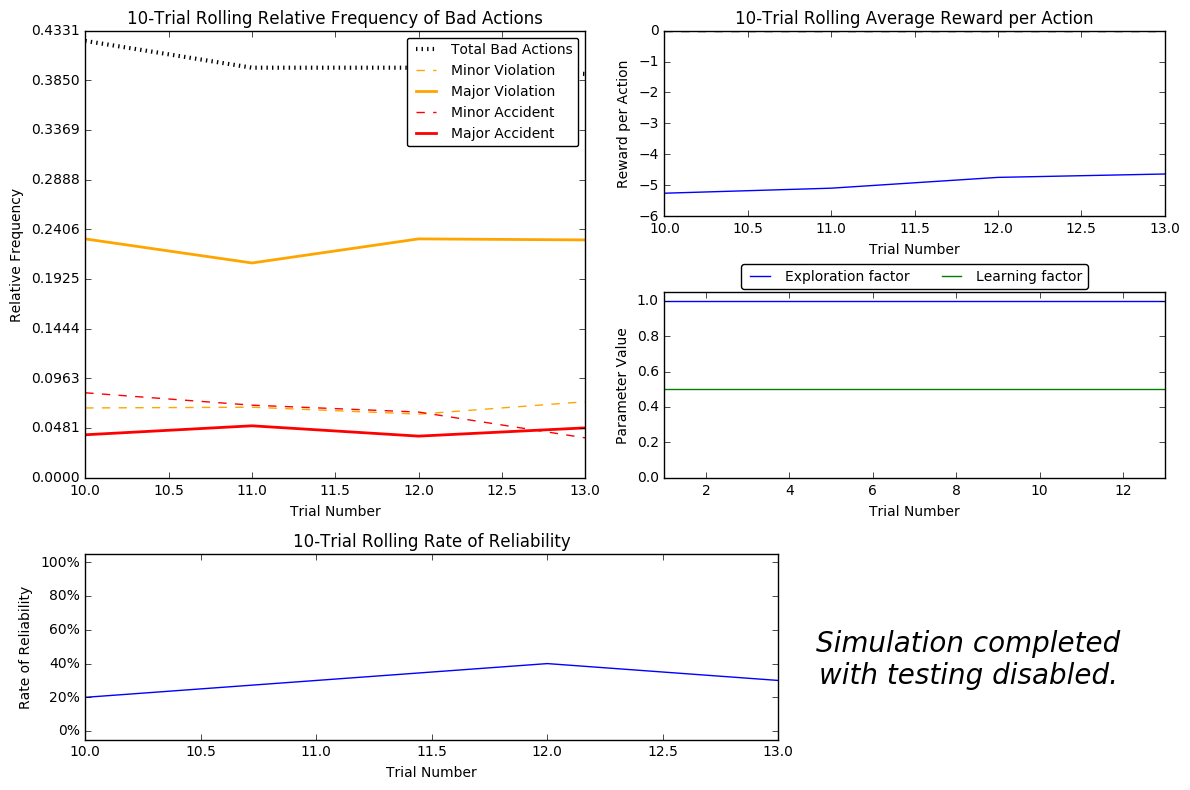

In [14]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_default-learning.csv')

### 问题 3
利用上面的从你初始模拟中得到的可视化结果，给出关于驾驶代理程序的分析和若干观察。确保对于可视化结果上的每个面板你至少给出一条观察结果。你可以考虑的一些情况：
- *驾驶代理程序多频繁地做出不良决策？有多少不良决策造成了事故？*
- *假定代理程序是随机驾驶，那么可靠率是否合理？*
- *代理程序对于它的行动会获得什么样的奖励？奖励是否表明了它收到严重的惩罚？*
- *随着试验数增加，结果输出是否有重大变化？*
- *这个智能出租车对于乘客来说，会被人为是安全的且/或可靠的吗？为什么或者为什么不？*

**答案：**
1. 从10-Trial Rolling Relative Frequecy of Bad Action面板中可以看出有40%左右的不良决策，其中有5%左右的不良决策造成了重大事故，9%左右的不良决策造成了较小的事故  
2. 从 Rate of Reliability 面板可以看出可考虑大约在20%-30%之间，在使用随机决策时，随机从四种动作中选择一个，而其中只有一个动作是恰当的，那么恰好选对的概率是25%，这个可靠率是合理的。
3. 代理程序应该获得惩罚，因为恰好选择正确的行动概率很低。从 Average Reward per Action面板中可以看出它确实收到了严重的惩罚。  
4. 从各个图标看，随着试验数增加，结果输出没有重大变化。因为每次决策都是随机进行的  
5. 这个智能出租车显然不够智能，并且是严重不安全且不可靠的。因为从图表数据上看，4成以上不良决策率和2成左右的可靠率，显然不适合载人出行。  

-----
## 通知驾驶代理程序
创建一个优化Q-Learning的驾驶代理程序的第二步，是定义一系列代理程序会在环境中发生的状态。根据输入、感知数据和驾驶代理程序可用的变量，可以为代理程序定义一系列状态，使它最终可以*学习*在一个状态下它需要执行哪个动作。对于每个状态的`'如果这个处于这个状态就那个行动'`的状况称为**策略**，就是最终驾驶代理程序要学习的。没有定义状态，驾驶代理程序就不会明白哪个动作是最优的——或者甚至不会明白它要关注哪个环境变量和条件！

### 识别状态
查看`'build_state()'`代理程序函数，它显示驾驶代理函数可以从环境中获得下列数据：
- `'waypoint'`，*智能出租车*去向目的地应该行驶的方向，它是*智能出租车*车头方向的相对值。
- `'inputs'`，*智能出租车*的感知器数据。它包括  
  - `'light'`，交通灯颜色。
  - `'left'`，*智能出租车*左侧车辆的目的方向。如果没有车辆，则返回`None`。
  - `'right'`，*智能出租车*右侧车辆的目的方向。如果没有车辆，则返回`None`。
  - `'oncoming'`，*智能出租车*交叉方向车辆的目的方向。如果没有车辆，则返回`None`。
- `'deadline'`，*智能出租车*在时间之内到达目的地还所需的剩余动作数目。

### 问题 4
*代理程序的哪些可用特征与学习**安全性**和**效率**相关性最高？你为什么认为这些特征适合在环境中对**智能出租车**建模？如果你没有选择某些特征，放弃他们的原因是什么？*

**回答：**
代理程序中的 state,valid_actions,next_waypoint 与学习安全性和效率相关性最高。其中的 state 特性描述当前车辆的状态，而当前的状态又决定了最佳的行动（最佳行动在 valid_actions中），所以 state 和 valid_actions 与**安全性**直接相关。state包含的属性中与安全性相关性最高的是**交通灯的颜色light**和**左右和交叉方向车辆的目的方向**，因为如果违背这几个属性应该遵循的规则将会酿成严重的事故。next_waypoint的取值关系到*智能出租*到达目的地的效率，如果不遵循 waypoint 的指示将于目标背道而驰，不能保证到达目的地的效率。  
此处问题中的**可用特征**似乎不够明确，可以理解为上述中的 state,valid_actions,next_waypoint,color 这些 Agent 的成员变量（属性），也可以理解为 Agent 在 Enviroment中的状态，也就是 Agent 的 state 属性中包含的那些特性，如 light,left,right,oncoming 等；如果**可用特征**指的是前者，那么这里放弃了 color 特性，因为这个特性在训练*智能出租车*时与安全性和效率完全没关系，但是在现实世界中，车辆颜色也许与安全性有一定的相关性。  
**补充回答：**  
通过审阅导师给的指点，在这里理解了需要采用右侧来车行使方向的特性**right**.
另外，这里 没有将 deadline 属性加入到状态描述中。因为 deadline 这个属性既不能促进智能车快速到达目的地也不能保证其安全性，这是因为智能车是根据 next_waypoint 指示来靠近目的地的，这个属性在状态中，训练后的小车会在不违反交规的情况下尽可能采取 next_waypoint对应的 Action，不管 deadline 的大小；在有 waypoint 指示情况下，如果想更快速的靠近目的地除非违法交规，否则智能优化路径规划，单纯的把 deadline 记入状态是起不到快速到达目的地的作用的，相反有可能会干扰小车对交通规则的学习。而且如果把 deadline 原始值直接加入到智能车的状态中，会造成状态空间的尺寸激增，会大大增加训练成本。


### 定义状态空间
当定义一系列代理程序会处于的状态，必需考虑状态空间的*大小*。就是说，如果你期望驾驶代理程序针对每个状态都学习一个**策略**，你会需要对于每一个代理状态都有一个最优的动作。如果所有可能状态的数量非常大，最后会变成这样的状况，驾驶代理程序对于某些状态学不到如何行动，会导致未学习过的决策。例如，考虑用下面的特征定义*智能出租车*的状态的情况：

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.
发生如`(False, True, True, True, False, False, '3AM')`的状态的频次如何？没有近乎无限数量的训练，很怀疑代理程序会学到一个合适的动作！

### 问题 5
*如果用你在**问题4**中选择的特征来定义一个状态，状态空间的大小是多少？假定你了解环境以及它是如何模拟的，你觉得经过合理数量的训练之后，代理驾驶能学到一个较好的策略吗？（遇见绝大部分状态都能作出正确决策。）*
**提示：** 考虑特征*组合*来计算状态的总数！

**回答：**  
问题4的答案中我选择了4个特性来描述状态，其中 
1. 交通灯颜色light 有2种取值(red,green)；  
2. 对面来车oncoming有4种取值(left,right,forward,none) 其中 none 代表没车  
3. 左侧来车left有4种取值(left,right,forward,none)
4. waypoint有4种取值(left,right,forward,none)其中 none 标识到达目的地。 


那么可以计算出状态空间为2 \* 4 \* 4 \* 4 = 128种，已知智能出租车的行动只有4种取值(left,right,forward,none)那么需要一个大小为128 x 4的Q矩阵，那么在有限且合理数量的训练之后，代理驾驶可以学到一个较好的策略。这里放弃里**右侧来车的行使方向right**，是因为右侧来车的行驶方向不会干扰到当前的行动选择，这是交规决定的，不考虑这个特性能够有效地减少状态空间的大小，并且不会影响驾驶的安全性。  
**补充回答：**  
根据审阅导师的指点，这里需要考虑右侧来车的行驶方向 right 属性。而且，根据**问题4**的补充回答中的分析，deadline 也会影响学习，所以把 deadline 分为三个级别加入到车辆的状态中。因此，状态空间的大小变为 light * oncoming * left * right * waypoint * deadline 也就是2 \* 4 \* 4 \* 4 \* 3  = 384种。根据状态空间的大小，可得Q矩阵的大小为 384 x 4 = 1536 **如何根据状态空间的大小来计算合理的训练次数？** 思考过程：得到合理的训练次数，意味着 Q 矩阵中每个节点的值都被遇到过，并且被更新，也就是说，一共要智能车至少进行1536次移动（此处考虑理想情况——每次移动都是不同的**状态行动组合**）。根据观察每轮训练中智能车大概移动20次左右，假设每轮步数为20次，那么需要至少进行80轮训练，才能覆盖所有的**状态行动组合**。这个假设过于理想，因为肯定包含很多相同状态组合，而且前期探索阶段很大概率是随机选择动作，后期需要减小探索因子强化前期习得的经验，需要更多轮的训练，此处估计需要进行近千轮的 训练才能得到一个比较可靠的 Q 矩阵。

### 更新驾驶代理程序的状态
要完成你的第二个实现，去到`'build_state()'`代理程序函数。根据你在**问题4**给出的判断，你现在要将`'state'`变量设定为包含所有Q-Learning所需特征的元组。确认你的驾驶代理程序通过运行代理程序文件和模拟会更新它的状态，注意状态是否显示了。如果用了可视化模拟，确认更新的状态和在模拟程序里看到的一致。

**注意：** 观察时记住重置模拟程序的标志到默认设定！

-----
## 实现Q-Learning驾驶代理程序
创建一个优化Q-Learning的驾驶代理程序的第三步，是开始实现Q-Learning自身的功能。Q-Learning的概念相当直接：每个访问的状态，为所有可用的状态-行动配对在Q-table里创建一条记录。然后，当代理程序遇到一个状态并执行了一个动作，基于获得的奖励和设定的相互的更新规则，来更新关联的状态-动作配对的Q-value。当然，Q-Learning还带来其他的收益，如此我们可以让代理程序根据每个可能的状态-动作配对的Q-values，来为每个状态选择*最佳*动作。在这个项目里，你会实现一个*衰减* $\epsilon$ *-贪心* 的Q-learning算法，不含折扣因子。遵从每个代理程序函数的**TODO**下的实现指导。

注意代理程序的属性`self.Q`是一个字典：这就是Q-table的构成。每个状态是`self.Q`字典的键，每个值是另一个字典，包含了*action*和*Q-value*。这里是个样例：

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

此外，注意你要求利用一个*衰减*$\epsilon$*（探索）因子*。因此，随着试验的增加，$\epsilon$会向0减小。这是因为，代理程序会从它的行为中学习，然后根据习得的行为行动。而且当$\epsilon$达到特定阈值后（默认阈值为0.01），代理程序被以它所学到的东西来作检测。作为初始的Q-Learning实现，你将实现一个线性衰减$\epsilon$的函数。

### Q-Learning模拟结果
要从最初的Q-learning程序获得结果，你需要调整下面的标志和设置：
- `'enforce_deadline'` - 将此标志设定为`True`来强制驾驶代理程序捕获它是否在合理时间内到达目的地。
- `'update_delay'` - 将此标志设定为较小数值（比如`0.01`）来减少每次试验中每步之间的时间。
- `'log_metrics'` - 将此标志设定为`True`将模拟结果记录为在`/logs/`目录下的`.csv`文件，Q-table存为`.txt`文件。
- `'n_test'` - 将此标志设定为`'10'`则执行10次测试试验。
- `'learning'` - 将此标志设定为`'True'`来告诉驾驶代理使用你的Q-Learning实现。

此外，使用下面的$\epsilon$衰减函数：

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

如果你在实施时遇到困难，尝试把`'verbose'`标志设为`True`来调试。调试时，在这里设定的标志会返回到它们的默认设定。重要的是你要理解每个标志做什么并且解释它们怎么影响模拟！

当你成功完成初始的Q-Learning模拟程序后，运行下面代码单元格来使结果可视化。注意当相同的模拟运行时，log文件会被覆写，所以要留意载入的log文件！

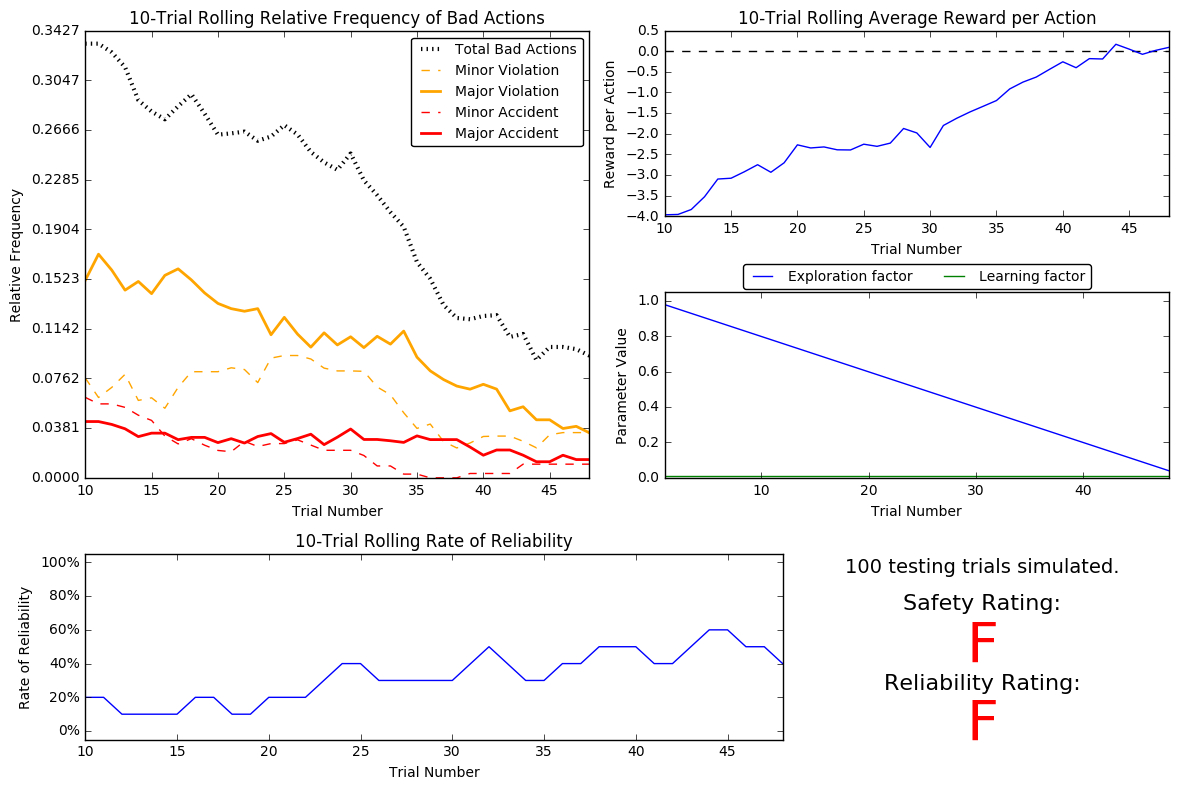

In [31]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### 问题 6
利用上面的从你默认的Q-Learning模拟中得到的可视化结果，像在**问题3**那样，给出关于驾驶代理程序的分析和若干观察。注意模拟程序应该也产生了Q-table存在一个文本文件中，可以帮到你观察代理程序的算法。你可以考虑的一些情况：
- *有没有观察到基本驾驶代理程序和默认的Q-Learning代理程序的相似之处？*
- *在测试之前驾驶代理大约需要做多少训练试验？在给定的$\epsilon$ 容忍度下，这个数字是否合理？*
- *你实现的$\epsilon$（探索因子）衰减函数是否准确地在参数面板中显示？*
- *随着试验数增加，不良动作的数目是否减少?平均奖励是否增加？*
- *与初始的驾驶代理程序相比，安全性和可靠性评分怎样？*

**回答：**  
1. 相似之处是可靠性非常低  
2. 50次，因为给定的容忍度是0.05，并且起始的 epsilon 是1，每次训练 epsilon 递减0.02，所以进行50次训练是合理的  
3. 衰减函数是每次训练递减0.02，准确的显示在参数面板中  
4. 从上图看，随着试验次数的增加，不良动作的数目是在减少，平均奖励在增加  
5. 与初始的每次选择随机动作的驾驶代理程序相比，安全性有所提升，可靠性随着训练次数的增加有所好转

-----
## 改进Q-Learning驾驶代理程序
创建一个优化Q-Learning的驾驶代理程序的第三步，是执行优化！现在Q-Learning算法已经实现并且驾驶代理程序已经成功学习了，需要调整设定、调节参数让驾驶代理程序学习**安全性**和**效率**。通常这一步需要很多试验和错误，因为某些设定必定会造成更糟糕的学习。要记住的一件事是学习的行为本身和需要的时间：理论上，我们可以允许代理程序用非常非常长的时间来学习；然而，Q-Learning另一个目的是*将没有习得行为的试验试验变为有习得行为的行动*。例如，训练中总让代理程序执行随机动作（如果$\epsilon = 1$并且永不衰减）当然可以使它*学习*，但是不会让它*行动*。当改进你的Q-Learning实现时，要考虑做一个特定的调整的意义，以及它是否逻辑上是否合理。

### 改进Q-Learning的模拟结果
要从最初的Q-learning程序获得结果，你需要调整下面的标志和设置：
- `'enforce_deadline'` - 将此标志设定为`True`来强制驾驶代理程序捕获它是否在合理时间内到达目的地。
- `'update_delay'` - 将此标志设定为较小数值（比如`0.01`）来减少每次试验中每步之间的时间。
- `'log_metrics'` - 将此标志设定为`True`将模拟结果记录为在`/logs/`目录下的`.csv`文件，Q-table存为`.txt`文件。
- `'learning'` - 将此标志设定为`'True'`来告诉驾驶代理使用你的Q-Learning实现。
- `'optimized'` - 将此标志设定为`'True'`来告诉驾驶代理你在执行一个优化版本的Q-Learning实现。

优化Q-Learning代理程序可以调整的额外的标志：
- `'n_test'` - 将此标志设定为某个正数（之前是10）来执行那么多次测试试验。
- `'alpha'` - 将此标志设定为0 - 1之间的实数来调整Q-Learning算法的学习率。
- `'epsilon'` - 将此标志设定为0 - 1之间的实数来调整Q-Learning算法的起始探索因子。
- `'tolerance'` - 将此标志设定为某个较小的大于0的值（默认是0.05）来设定测试的epsilon阈值。

此外，使用一个你选择的$\epsilon$ (探索因子)衰减函数。注意无论你用哪个函数，**一定要以合理的速率衰减**到`'tolerance'`。Q-Learning代理程序到此才可以开始测试。某个衰减函数的例子($t$是试验的数目)：

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$

如果你想的话，你也可以使用$\alpha$ （学习率） 的衰减函数，当然这通常比较少见。如果你这么做了，确保它满足不等式$0 \leq \alpha \leq 1$。
如果你在实施时遇到困难，尝试把`'verbose'`标志设为`True`来调试。调试时，在这里设定的标志会返回到它们的默认设定。重要的是你要理解每个标志做什么并且解释它们怎么影响模拟！

当你成功完成初始的Q-Learning模拟程序后，运行下面代码单元格来使结果可视化，请注意为了达到项目要求你需要在安全性和可靠性上获得至少都为A的评分。注意当相同的模拟运行时，log文件会被覆写，所以要留意载入的log文件！

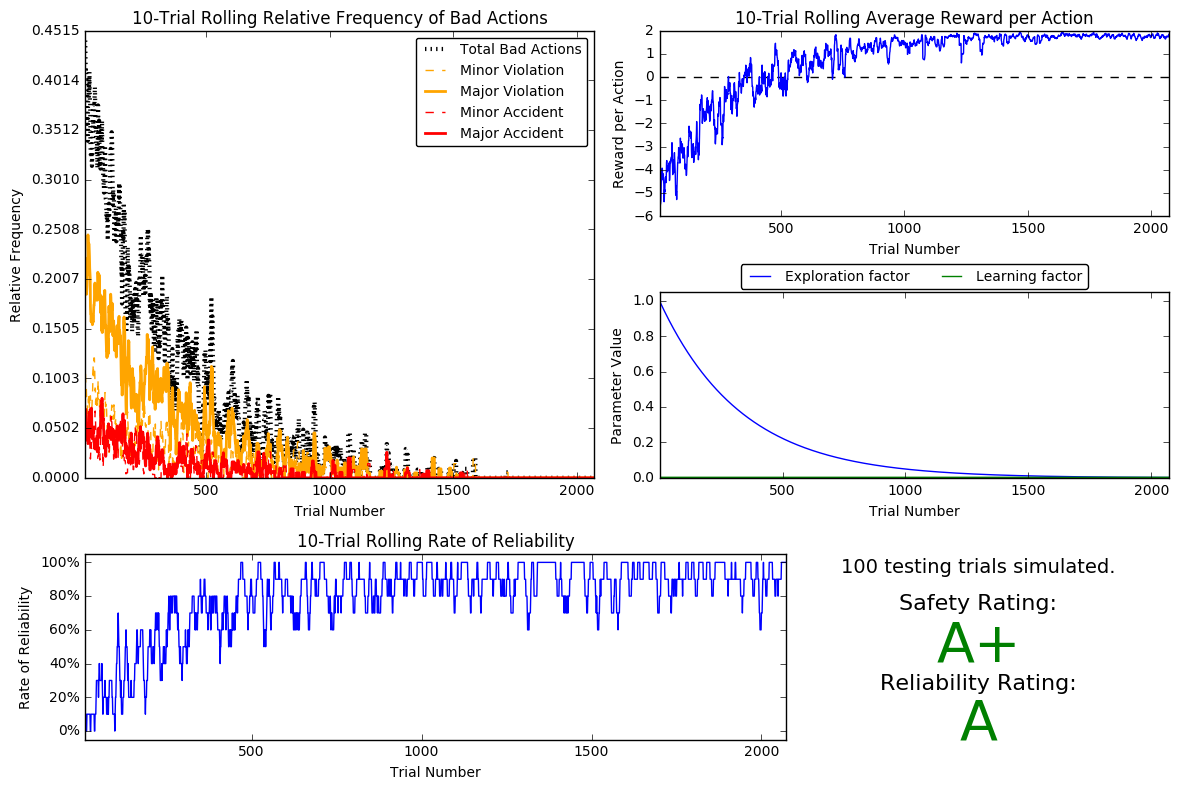

In [8]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### 问题7
利用上面的从你改进的Q-Learning模拟中得到的可视化结果，像在**问题6**那样，给出关于改进的驾驶代理程序的最终分析和观察。你需要回答的问题：
- *使用了什么epsilon（探索因子）的衰减函数？*
- *在测试之前驾驶代理大约需要做多少训练试验？*
- *你用了什么epsilon-tolerance和alpha（学习率）值？为什么？*
- *与之前的默认Q-Learning学习器相比，这个Q-Learning学习器有多少改进？ *
- *你会说Q-Learning学习器的结果表明了你的驾驶代理程序成功地学习了一个合适的策略吗？*
- *你对*智能出租车*的安全性和可靠性评分满意吗？*

**回答：**  
1. 使用了提示中的最后一种 ϵ=cos(at),for 0<a<1  
2. 根据上述公式，探索因子衰减到0.001时进行了159次训练试验  
3. epsilon-tolerance选择了0.001，学习率 alpha 选择了0.01。因为衰减函数选择了 cos 函数，所以选择了较小的 epsilon-tolerance 保证训练中的探索因子能尽可能的逼近0，也就是后期的训练已经较少的使用随机探索，而较多的使用之前训练获得的 Q 值。学习率 alpha 描述了同一状态采取相同动作获得的奖励有多大比例的差异更新 Q，这里选择0.01选择了比较少的强化同一状态采取同一动作获得的奖励（或惩罚）  
4. 与之前默认的Q-Learning学习器想必，这个学习器改进巨大，实现了较强的安全性和可靠性  
5. 这个Q-Learning学习器的测试标明驾驶代理成功的学习了一个合适的策略  
6. 看分数很满意。但是从测试数据上看，还是有个别测试失败，也就是说这个驾驶代理程序没有保证100%的安全，而且还会有波动，也就是说有时会比现在的表现差一些。  

**更正&补充**  
1. 更换了探索因子的衰减函数为ϵ=cos(at),此处a 选择了0.003是为了得到合适衰减曲线，尾部足够贴近0，使得训练后期能够强化先前积累的经验  
2. 根据上述公式，探索因子衰减到0.002时，共进行了2071次训练试验  
3. epsilon-tolerance选择了0.002，学习率 alpha 选择了0.003。根据评审导师的意见，这个学习率有点偏小，但是经过几次测试，这个值首先可以保证探索因子能够以一个比较合适的曲线衰减，其次测试结果还不错，在训练前期可能有“学不进去”的情况，但在后前加强经验时比较保守不会造成比较大的误更新。  
4. 从Bad Action的变化曲线可以看出在1600次训练之后，安全性已经很稳定；可靠性也比默认的 Q-Learning 学习期强了很多，但是即便是训练后期波动也比较大。  
5. 从安全性来看，这个学习器已经比较可靠地习得了安全规则；单从可靠性来看，还远够不上完美  



### 定义一个最优策略

有时，对于重要的问题*“我要让我的代理程序学习什么？”*的答案，只是理论性的，无法具体描述。然而这里，你可以具体定义代理程序要学什么，就是美国通行权交通法案。这些法律是已知信息，你可以基于这些法律，为*智能出租车*进一步定义每一个状态所做的最优动作。在那种情况下，我们称这一系列最优状态-动作配对为**最优策略**。因此，不像那些理论性的回答，不仅通过收到的奖励（惩罚），而且纯观察，代理程序是否在“错误”地行动能很清晰地得知。如果代理程序闯了红灯，我们既看见它获得了一个负面奖励，也知道这是一个错误的行为。这可以用来帮你验证驾驶代理程序习得的**策略**是否正确，或只是个**次优策略**。

### 问题 8
给出几个关于最优策略是什么样子的例子（用你已定义的状态）。之后，查看`'sim_improved-learning.txt'`文本文件，看你的改进的Q-Learning算法的结果。_每个从模拟中纪录的状态，对于给定的状态，**策略**（得分最高的动作）是否正确？是否对于有些状态，有策略不同于预期的最优策略？_给出一个状态和记录的状态-动作的奖励，解释为什么正是个正确的策略。

**回答：**   
以下是几条最优策略举例：  
**补充**  
我理解的在某一状态下最优策略的定义是：在不违反交通规则并且不出交通事故的前提下，尽可能的靠近目标（在这个项目中就是遵循 waypoint）。当交通规则限制智能车行动，不能遵循 waypoint 的方向时，采取一个安全的动作（策略）避免出现交通事故，也算是一个正确的策略。本项目中，因为智能车不知道最终的目的地在当前位置的具体方向（例如左前，右前，左后，右后等），所以在受规则限制无法采取 waypoint 指示的动作时，有可能会采取偏离目的地方向的动作。例如，假设目的地在智能车当前位置的**左前方**，并且 waypoint 指示**向左**，如果当前路面的状态不允许向左转的时候，如果路面状态允许**向前或者向右**，那么这个**向前**应该是最优策略，而此时如果**向右**就不是个最优选择。但是，因为智能车不知道目的地在自己的具体相对方向，也就是假设不成立，那么在训练得来的 **状态--动作**分值，就有可能出现**非最优动作**最高分值的可能，这是因为智能车自身的已知限制，那么如果这个**非最优**动作避免了交通事故，即便暂时远离了目的地，也算是一个正确的策略。

|next_waypoint|light|left|oncoming|**Action**|
|----|----|----|----|:----:|
|forward|green|None|None|forward|
|left|green|None|forward|right|
|right|green|right|None|right|

sim_improved-learning.txt文件中前两个策略与最优策略相同，记录如下：  
```
forward-green-None-None
 -- forward : 1.15
 -- right : 0.13
 -- None : -1.27
 -- left : 0.20
 以上状态，forward 得分最高，与最优策略相符
left-green-None-forward
 -- forward : 0.04
 -- right : 0.16
 -- None : -0.30
 -- left : -1.71
 以上状态，right 得分最高，与最有策略相符
```
不同的策略： 
```
right-green-right-None
 -- forward : 0.03
 -- right : 0.00
 -- None : -0.26
 -- left : 0.01
```
上述状态预期的最优动作是 right，但是训练得出的最高得分动作是 forward，这个动作有悖于 waypoint 也就是目的地方向，但是不会违章或者造成事故，是个安全的动作，但不够优。之所以没有选择 right 有可能是训练这个状态的次数还不够多。

-----
### 选做：未来奖励 - 折扣因子 `'gamma'`
也许你会好奇，作为Q-Learning算法的一部分，之前要求你在实现中**不要**使用折扣引子`'gamma'`。在算法中包含未来奖励能有助于在未来状态回溯到当前状态时的反向正面奖励。本质上，如果给予驾驶代理程序执行若干动作到达不同状态的选择，包含未来奖励会是代理程序偏向可以得到更多奖励的状态。一个例子是驶向目的的驾驶代理程序：所有行动和奖励都相等，那么理论上如果到达目的地会有额外奖励，驶向目的会获得更好的奖励。然而，即使在这个项目里，驾驶代理程序也要在规定的时间里到达目的地，包含未来奖励不会有益于代理程序。实际上，如果代理程序给予多次试验学习，它甚至会给Q-value带来负面影响！

### 可选问题 9
*在项目中有两个特点使得未来奖励在这个Q-Learning算法无效。一个特点是关于*智能出租车*本身，另一个是关于环境。你能指出它们是什么以及为什么未来奖励不会在这个项目中起效？*

**回答：**  
智能出租车本身的局限性，智能车无法得知下一步会采取哪种动作，因为环境是随时变化的，也许因为环境的限制不得不为了安全选择远离目的地的方向。那么也就没有办法得知下一步动作得到的奖励（惩罚）是怎样的，因为即便是暂时远离了目的地也应该得到一个正向的奖励，而不是惩罚。  
  环境的局限在于，不是每次移动都会重新计算当前距离目的地的距离，也就无法得知未来一步智能车是远离了目的地还是靠近了目的地，所以很难给出一个确定的奖励或者惩罚。  
  另外，如果每次移动，智能车距离目的地近了一些就给一个更好的（或者额外的）奖励，那么经过多轮的训练，会使智能车比较激进地靠近目的地，不惜违背交规导致事故发生，那么这个额外的奖励就会给 Q-value 带来负面的影响。  
  **补充回答**  
  智能车不知道当前距离目的地有多远，也就无法判断在执行了一个动作后，自己是靠近了目的地，还是远离了目的地，那么也就无法给出一个合理的未来奖励。  
  在智能车训练的环境中，每轮训练都是随机生成目的地和智能车的坐标，而且每轮训练都有 deadline 的限制。所以未来奖励不能随着智能车到达目的地“扩散”到出发点，那么未来奖励也就失去了意义，甚至会适得其反。

> **注意**:当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出**File -> Download as -> HTML (.html)**把这个 HTML 和这个 iPython notebook 一起做为你的作业提交。